In [1]:
!pip install -U transformers
!pip install -U accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 26.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.9/330.9 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.34.2
    Uninstalling accelerate-0.34.2:
      Successfully uninstalled accelerate-0.34.2


In [2]:
!pip install -U datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
from datasets import load_dataset

In [4]:
data = load_dataset('tner/bc5cdr')
data

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


bc5cdr/train/0000.parquet:   0%|          | 0.00/367k [00:00<?, ?B/s]

bc5cdr/validation/0000.parquet:   0%|          | 0.00/364k [00:00<?, ?B/s]

bc5cdr/test/0000.parquet:   0%|          | 0.00/386k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5228 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5330 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5865 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 5228
    })
    validation: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 5330
    })
    test: Dataset({
        features: ['tokens', 'tags'],
        num_rows: 5865
    })
})

In [5]:
data['train'].features

{'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'tags': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None)}

In [6]:
pd.DataFrame(data['train'][:])[['tokens', 'tags']].iloc[0]

,0
tokens,"[Naloxone, reverses, the, antihypertensive, ef..."
tags,"[1, 0, 0, 0, 0, 0, 1, 0]"


In [7]:
tags = data['train'].features['tags']
tags

Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None)

In [8]:
tags = data['train'].features['tags'].feature
tags

Value(dtype='int32', id=None)

In [9]:
# label_names = ner_feature.feature.names
label_names={
    "O": 0,
    "B-Chemical": 1,
    "B-Disease": 2,
    "I-Disease": 3,
    "I-Chemical": 4
}
label_names = {v: k for k, v in label_names.items()}
label_names

{0: 'O', 1: 'B-Chemical', 2: 'B-Disease', 3: 'I-Disease', 4: 'I-Chemical'}

In [10]:
labels = data["train"][42]["tags"]
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:

labels=[label_names[k] for k in labels]
labels

['O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-Disease',
 'I-Disease',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'B-Chemical',
 'I-Chemical',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O']

In [12]:
tags=labels

In [13]:
# converting ner_tags index to tag
index2tag = {idx:tag for idx, tag in enumerate(tags)}
tag2index = {tag:idx for idx, tag in enumerate(tags)}
index2tag

{0: 'O',
 1: 'O',
 2: 'O',
 3: 'O',
 4: 'O',
 5: 'O',
 6: 'O',
 7: 'O',
 8: 'O',
 9: 'O',
 10: 'O',
 11: 'B-Disease',
 12: 'I-Disease',
 13: 'O',
 14: 'O',
 15: 'O',
 16: 'O',
 17: 'O',
 18: 'O',
 19: 'O',
 20: 'O',
 21: 'O',
 22: 'O',
 23: 'O',
 24: 'O',
 25: 'O',
 26: 'B-Chemical',
 27: 'I-Chemical',
 28: 'O',
 29: 'O',
 30: 'O',
 31: 'O',
 32: 'O',
 33: 'O',
 34: 'O',
 35: 'O',
 36: 'O',
 37: 'O'}

In [14]:
tag2index

{'O': 37, 'B-Disease': 11, 'I-Disease': 12, 'B-Chemical': 26, 'I-Chemical': 27}

In [15]:
index2tag

{0: 'O',
 1: 'O',
 2: 'O',
 3: 'O',
 4: 'O',
 5: 'O',
 6: 'O',
 7: 'O',
 8: 'O',
 9: 'O',
 10: 'O',
 11: 'B-Disease',
 12: 'I-Disease',
 13: 'O',
 14: 'O',
 15: 'O',
 16: 'O',
 17: 'O',
 18: 'O',
 19: 'O',
 20: 'O',
 21: 'O',
 22: 'O',
 23: 'O',
 24: 'O',
 25: 'O',
 26: 'B-Chemical',
 27: 'I-Chemical',
 28: 'O',
 29: 'O',
 30: 'O',
 31: 'O',
 32: 'O',
 33: 'O',
 34: 'O',
 35: 'O',
 36: 'O',
 37: 'O'}

In [16]:
print(tags)

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Disease', 'I-Disease', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Chemical', 'I-Chemical', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [17]:
print(type(tags))

<class 'list'>


In [18]:
print(type(1))

<class 'int'>


In [19]:
# class Tags:
#     def __init__(self, names):
#         self.names = names

#     def int2str(self, label):
#         return self.names[label]

# # Original tags object
# tags_obj = Tags(tag)

# # Convert tags object to list
# tags_list = tags_obj.names

# print(tags_list)


# class Tags:
#     def __init__(self, names):
#         self.names = names

#     def int2str1(self, label):
#         return self.names[label]

# # Original tags object
# tags_list = tags

# # Create an instance of Tags class
# tags_obj = Tags(tags_list)

# # Call int2str1 method on tags_obj
# print(tags_obj.int2str1(2))  # Output: B-Disease

# tags=tags_obj



class Tags:
    def __init__(self, names):
        self.names = names

    def int2str1(self, label):
        return self.names[label]

# Example usage:
tags = Tags(['O', 'B-Disease', 'I-Disease', 'B-Chemical', 'I-Chemical'])

# Original tags object (list of labels)
tags_list = ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Disease', 'I-Disease', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Chemical', 'I-Chemical', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

# Convert tags_list to an instance of Tags class
tags_obj = Tags(tags_list)

# Call int2str1 method on tags_obj for label at index 1
print(tags_obj.int2str1(1))  # Output: B-Disease

# Assuming 'tags' is a variable that changes in each iteration:
# You need to update the 'names' attribute of tags_obj with the new list of labels
# Example:
new_tags_list = ['O', 'B-Chemical', 'I-Chemical', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Disease', 'I-Disease', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
tags_obj.names = new_tags_list

# Call int2str1 method on updated tags_obj for label at index 1
print(tags_obj.int2str1(1))  # Output: B-Chemical


O
B-Chemical


In [20]:
# tags=tags_list

In [21]:
tags.int2str1(2)

'I-Disease'

In [22]:
tags

In [23]:
# converting index to tagging names
def create_tag_names(batch):
  tag_name = {'ner_tags_str': [tags.int2str1(idx) for idx in batch['tags']]}
  return tag_name

In [24]:
data = data.map(create_tag_names)
data

Map:   0%|          | 0/5228 [00:00<?, ? examples/s]

Map:   0%|          | 0/5330 [00:00<?, ? examples/s]

Map:   0%|          | 0/5865 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['tokens', 'tags', 'ner_tags_str'],
        num_rows: 5228
    })
    validation: Dataset({
        features: ['tokens', 'tags', 'ner_tags_str'],
        num_rows: 5330
    })
    test: Dataset({
        features: ['tokens', 'tags', 'ner_tags_str'],
        num_rows: 5865
    })
})

In [25]:
pd.DataFrame(data['train'][:])[['tokens', 'tags', 'ner_tags_str']].iloc[0]

,0
tokens,"[Naloxone, reverses, the, antihypertensive, ef..."
tags,"[1, 0, 0, 0, 0, 0, 1, 0]"
ner_tags_str,"[B-Disease, O, O, O, O, O, B-Disease, O]"


# ***EDA***

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset = load_dataset("tner/bc5cdr")
df = pd.DataFrame(dataset["train"])

# Data Exploration
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228 entries, 0 to 5227
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tokens  5228 non-null   object
 1   tags    5228 non-null   object
dtypes: object(2)
memory usage: 81.8+ KB
None


In [27]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
        tokens          tags
count     5228          5228
unique    5141          3410
top     [v, .]  [0, 0, 0, 0]
freq        16           201


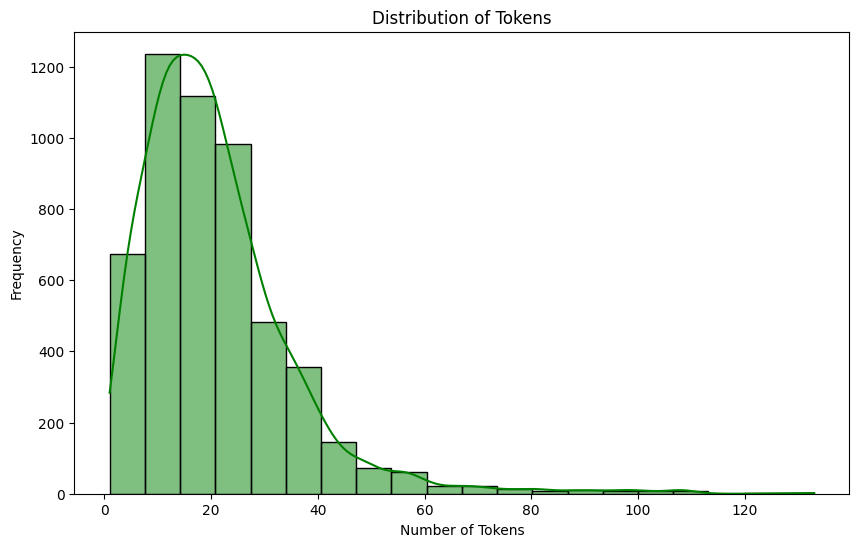

In [28]:
# Visualization with Seaborn
# Example plots: Distribution of length of tokens
plt.figure(figsize=(10, 6))
sns.histplot(df['tokens'].apply(len), bins=20, kde=True, color='green')
plt.title('Distribution of Tokens')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

<ipython-input-29-533f87adff46>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='token', data=df_flat, palette=custom_palette, order=df_flat['token'].value_counts().index[:30])


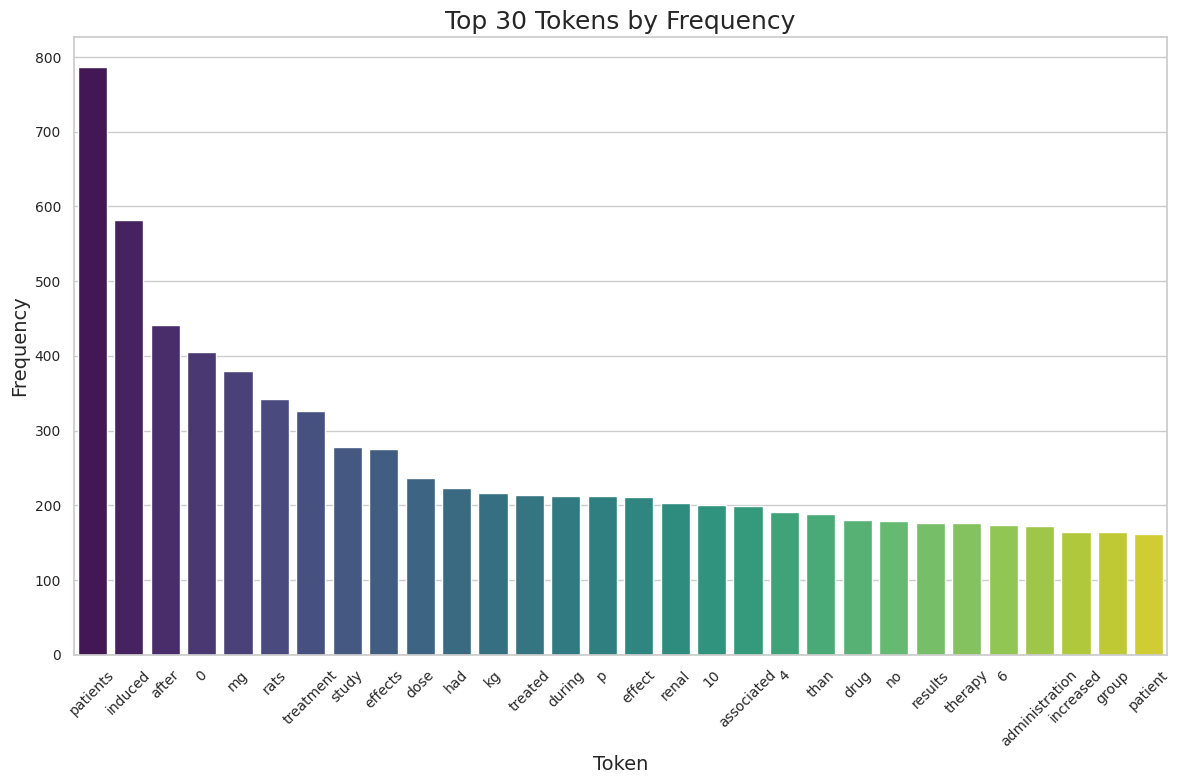

In [29]:
import string

# Flatten the 'tokens' column and remove specified words
flat_tokens = [''.join(token.translate(str.maketrans('', '', string.punctuation)).lower().split()) for sublist in df['tokens'] for token in sublist if token.lower() not in ['the', 'of', 'in', 'and', 'to', 'is', 'for', 'that', 'at', 'an', 'a', 'this', 'have', 'from','with','was','by','we','were','these','as','or','are','be','on','1','been','not','two','which','one','has','2','3','5','all','but']]

# Remove empty strings
flat_tokens = [token for token in flat_tokens if token]

# Create a new DataFrame with flattened tokens
df_flat = pd.DataFrame({'token': flat_tokens})

# Set the style and palette for the plot
sns.set(style='whitegrid')
custom_palette = sns.color_palette("viridis", 30)  # Choose 30 colors from the Viridis color palette

# Plot the count of each token
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='token', data=df_flat, palette=custom_palette, order=df_flat['token'].value_counts().index[:30])
ax.set_title('Top 30 Tokens by Frequency', fontsize=18)
ax.set_xlabel('Token', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.tick_params(axis='x', labelrotation=45, labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.tight_layout()
plt.show()

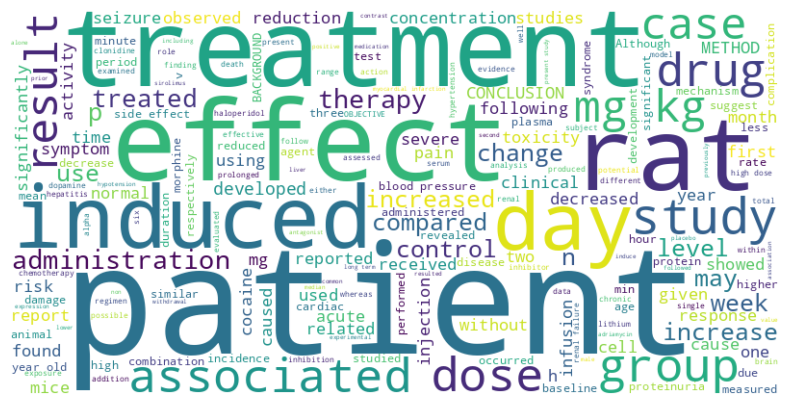

In [30]:
from wordcloud import WordCloud

# Load the dataset
dataset = load_dataset("tner/bc5cdr")

# Access the text data from the dataset
text_data = dataset["train"]["tokens"]

# Flatten the list of tokens into a single string
text = ' '.join([' '.join(tokens) for tokens in text_data])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()

<ipython-input-31-43dc2a9adba6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ner_tag', data=df_flat_ner_tags, palette='viridis')


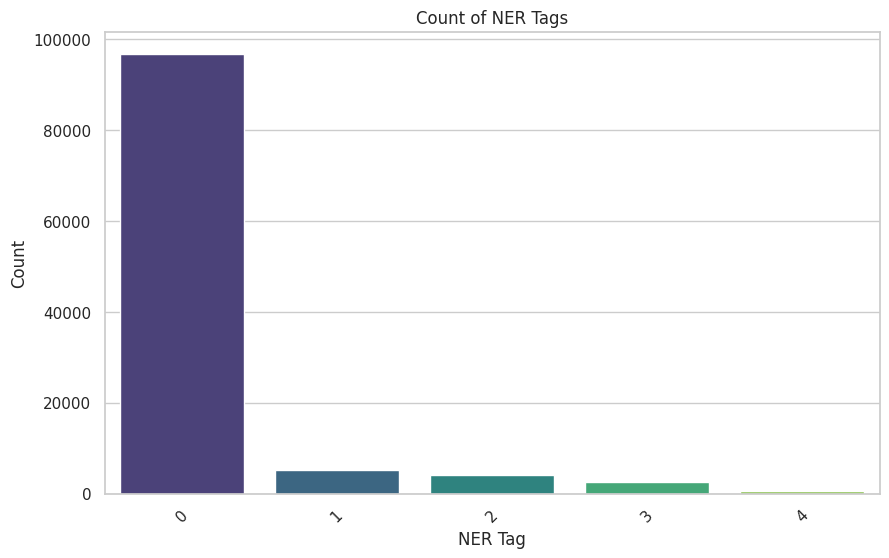

In [31]:
# Flatten the 'ner_tags' column
flat_ner_tags = [tag for sublist in df['tags'] for tag in sublist]

# Create a new DataFrame with flattened NER tags
df_flat_ner_tags = pd.DataFrame({'ner_tag': flat_ner_tags})

# Plot the count of each NER tag
plt.figure(figsize=(10, 6))
sns.countplot(x='ner_tag', data=df_flat_ner_tags, palette='viridis')
plt.title('Count of NER Tags')
plt.xlabel('NER Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Model Building

In [32]:
from transformers import AutoTokenizer

model_checkpoint = "emilyalsentzer/Bio_ClinicalBERT"

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

In [33]:
tokenizer.is_fast

True

In [34]:

inputs = data['train'][0]['tokens']
inputs = tokenizer(inputs, is_split_into_words=True)
print(inputs.tokens())

['[CLS]', 'na', '##lo', '##xon', '##e', 'reverse', '##s', 'the', 'anti', '##hy', '##pert', '##ens', '##ive', 'effect', 'of', 'c', '##lon', '##id', '##ine', '.', '[SEP]']


In [35]:
print(data['train'][0]['tokens'])
print(data['train'][0]['ner_tags_str'])

['Naloxone', 'reverses', 'the', 'antihypertensive', 'effect', 'of', 'clonidine', '.']
['B-Disease', 'O', 'O', 'O', 'O', 'O', 'B-Disease', 'O']


In [36]:
print(inputs.word_ids())

[None, 0, 0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 4, 5, 6, 6, 6, 6, 7, None]


In [37]:
# method to align these tokens  to avoid misalignment
def align_labels_with_tokens(labels, word_ids):
  new_labels = []
  current_word=None
  for word_id in word_ids:
    if word_id != current_word:
      current_word = word_id
      label = -100 if word_id is None else labels[word_id]
      new_labels.append(label)

    elif word_id is None:
      new_labels.append(-100)

    else:
      label = labels[word_id]

      if label%2==1:
        label = label + 1
      new_labels.append(label)

  return new_labels

In [38]:
labels = data['train'][0]['tags']
word_ids = inputs.word_ids()
print(labels, word_ids)

[1, 0, 0, 0, 0, 0, 1, 0] [None, 0, 0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 3, 4, 5, 6, 6, 6, 6, 7, None]


In [39]:
print(align_labels_with_tokens(labels, word_ids))

[-100, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, -100]


In [40]:

def tokenize_and_align_labels(examples):
  tokenized_inputs = tokenizer(examples['tokens'], truncation=True, is_split_into_words=True)

  all_labels = examples['tags']

  new_labels = []
  for i, labels in enumerate(all_labels):
    word_ids = tokenized_inputs.word_ids(i)
    new_labels.append(align_labels_with_tokens(labels, word_ids))

  tokenized_inputs['labels'] = new_labels

  return tokenized_inputs

In [41]:
tokenized_datasets = data.map(tokenize_and_align_labels, batched=True, remove_columns=data['train'].column_names)

Map:   0%|          | 0/5228 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map:   0%|          | 0/5330 [00:00<?, ? examples/s]

Map:   0%|          | 0/5865 [00:00<?, ? examples/s]

In [42]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 5228
    })
    validation: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 5330
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 5865
    })
})

## Data Collation and Metrics


In [43]:
#The collator will be responsible for batching and preprocessing input data and labels before feeding them into the model during training.
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

In [44]:
batch = data_collator([tokenized_datasets['train'][i] for i in range(2)])
batch

{'input_ids': tensor([[  101,  9468,  2858, 21501,  1162,  7936,  1116,  1103,  2848,  7889,
         17786,  5026,  2109,  2629,  1104,   172,  4934,  2386,  2042,   119,
           102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0],
        [  101,  1107,  8362,  6354,  2050,  4638, 26300,   117, 20061,  1193,
           177, 24312, 27291, 13475,  1103,  9711,  1107,  1892,  2997,  1105,
          1762,  2603,  1666,  1118,  1107,  4487,  7912,  2285,   172,  4934,
          2386,  2042,   117,   126,  1106,  1406, 17599, 12139,  1116,   120,
          4023,   117,  1108,  1107, 23034,  1174,  1137, 11802,  1118,  9468,
          2858, 19315,   117,   121,   119,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

## Metrics

In [45]:
!pip install seqeval
!pip install evaluate

import evaluate
metric = evaluate.load('seqeval')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=9f8bea8d9ba8ca709e5266f1493076316c4f14dd62e601d8f46e300be3359956
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.5 MB/s eta 0:00:00


In [46]:
ner_feature = data['train'].features['tags']
ner_feature

Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None)

In [47]:
# label_names = ner_feature.feature.names
# label_names

AttributeError: 'Value' object has no attribute 'names'

In [48]:
label_names=[ "O",
    "B-Chemical",
    "B-Disease",
    "I-Disease",
    "I-Chemical"]

label_names

['O', 'B-Chemical', 'B-Disease', 'I-Disease', 'I-Chemical']

In [49]:
labels = data['train'][0]['tags']
labels = [label_names[i] for i in labels]
labels

['B-Chemical', 'O', 'O', 'O', 'O', 'O', 'B-Chemical', 'O']

In [50]:
predictions = labels.copy()
predictions[2] = "O"

metric.compute(predictions=[predictions], references=[labels])

{'Chemical': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 2},
 'overall_precision': 1.0,
 'overall_recall': 1.0,
 'overall_f1': 1.0,
 'overall_accuracy': 1.0}

In [51]:
import numpy as np

def compute_metrics(eval_preds):
  logits, labels = eval_preds

  predictions = np.argmax(logits, axis=-1)
  # ignoring the unused case

  true_labels = [[label_names[l] for l in label if l!=-100] for label in labels]

  true_predictions = [[label_names[p] for p,l in zip(prediction, label) if l!=-100]
                      for prediction, label in zip(predictions, labels)]

  all_metrics = metric.compute(predictions=true_predictions, references=true_labels)

  return {"precision": all_metrics['overall_precision'],
          "recall": all_metrics['overall_recall'],
          "f1": all_metrics['overall_f1'],
          "accuracy": all_metrics['overall_accuracy']}

## Model Training

In [52]:
id2label = {i:label for i, label in enumerate(label_names)}
label2id = {label:i for i, label in enumerate(label_names)}

In [53]:
print(id2label)

{0: 'O', 1: 'B-Chemical', 2: 'B-Disease', 3: 'I-Disease', 4: 'I-Chemical'}


In [54]:
#In summary, this code loads a pre-trained model for token classification tasks using the Hugging Face Transformers library. The model is automatically selected based on the provided model checkpoint, and additional parameters (id2label and label2id) can be provided to handle label mapping during inference.
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained(
                                                    model_checkpoint,
                                                    id2label=id2label,
                                                    label2id=label2id)

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [55]:
model.config.num_labels

5

In [56]:
from transformers import TrainingArguments

args = TrainingArguments("distilbert-finetuned-ner",
                         evaluation_strategy = "epoch",
                         save_strategy="epoch",
                         learning_rate = 2e-5,
                         num_train_epochs=7,
                         weight_decay=0.01)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [57]:
from transformers import Trainer
trainer = Trainer(model=model,
                  args=args,
                  train_dataset = tokenized_datasets['train'],
                  eval_dataset = tokenized_datasets['validation'],
                  data_collator=data_collator,
                  compute_metrics=compute_metrics,
                  tokenizer=tokenizer)

trainer.train()

Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.248100,0.138021,0.897993,0.886903,0.892414,0.953687
2,0.094300,0.151645,0.891004,0.915265,0.902971,0.956912
3,0.059500,0.171376,0.902304,0.909278,0.905778,0.958421
4,0.021800,0.206401,0.897284,0.917647,0.907351,0.957899
5,0.012100,0.228338,0.907696,0.909569,0.908632,0.958737
6,0.010600,0.243957,0.899236,0.916456,0.907764,0.957744
7,0.005000,0.251505,0.900644,0.914306,0.907423,0.957609


TrainOutput(global_step=4578, training_loss=0.05452598046141975, metrics={'train_runtime': 835.8184, 'train_samples_per_second': 43.785, 'train_steps_per_second': 5.477, 'total_flos': 1242291550958640.0, 'train_loss': 0.05452598046141975, 'epoch': 7.0})

In [59]:
from transformers import pipeline

checkpoint = "/content/distilbert-finetuned-ner/checkpoint-4578"
token_classifier = pipeline(
    "token-classification", model=checkpoint, aggregation_strategy="simple"
)

token_classifier("The study investigated the effects of prolonged exposure to benzene, a known carcinogen, on the prevalence of leukemia, a type of blood cancer. The research, conducted over a five-year period, involved a cohort of workers from various industrial settings where benzene exposure was common. The results indicated a statistically significant increase in the incidence of leukemia among individuals with higher levels of benzene exposure compared to those with minimal exposure. Moreover, the study identified specific subtypes of leukemia, such as acute myeloid leukemia (AML) and chronic lymphocytic leukemia (CLL), that were more prevalent in the high-exposure group. Further analysis revealed a dose-response relationship between benzene exposure levels and the risk of developing leukemia, highlighting the importance of stringent occupational safety measures and regulatory policies to minimize exposure to this hazardous chemical. The findings underscore the critical need for targeted interventions aimed at reducing benzene exposure in industrial settings to mitigate the risk of occupational diseases such as leukemia, thereby safeguarding the health and well-being of workers.")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'entity_group': 'Chemical',
  'score': 0.99989283,
  'word': 'ben',
  'start': 60,
  'end': 63},
 {'entity_group': 'Disease',
  'score': 0.9999201,
  'word': '##zen',
  'start': 63,
  'end': 66},
 {'entity_group': 'Disease',
  'score': 0.9999207,
  'word': '##e',
  'start': 66,
  'end': 67},
 {'entity_group': 'Disease',
  'score': 0.99986815,
  'word': 'le',
  'start': 110,
  'end': 112},
 {'entity_group': 'Disease',
  'score': 0.9999269,
  'word': '##uke',
  'start': 112,
  'end': 115},
 {'entity_group': 'Disease',
  'score': 0.99993217,
  'word': '##mia',
  'start': 115,
  'end': 118},
 {'entity_group': 'Disease',
  'score': 0.9979367,
  'word': 'blood cancer',
  'start': 130,
  'end': 142},
 {'entity_group': 'Chemical',
  'score': 0.9998995,
  'word': 'ben',
  'start': 261,
  'end': 264},
 {'entity_group': 'Disease',
  'score': 0.99990714,
  'word': '##zen',
  'start': 264,
  'end': 267},
 {'entity_group': 'Disease',
  'score': 0.9999113,
  'word': '##e',
  'start': 267,
  'end': 

In [60]:
def merge_tokens(entities):
    merged_entities = []
    current_entity = None

    for entity in entities:
        if current_entity is None:
            current_entity = entity
        elif "##" in entity['word']:
            current_entity['word'] += entity['word'][2:]  # Remove "##" and concatenate the rest
            current_entity['end'] = entity['end']
        else:
            merged_entities.append(current_entity)
            current_entity = entity

    if current_entity is not None:
        merged_entities.append(current_entity)

    return merged_entities

# Example usage
entities = [
    {'entity_group': 'Chemical',
  'score': 0.99105835,
  'word': 'ben',
  'start': 60,
  'end': 63},
 {'entity_group': 'Disease',
  'score': 0.9828804,
  'word': '##zen',
  'start': 63,
  'end': 66},
 {'entity_group': 'Disease',
  'score': 0.98979366,
  'word': '##e',
  'start': 66,
  'end': 67},
 {'entity_group': 'Disease',
  'score': 0.9485936,
  'word': 'le',
  'start': 110,
  'end': 112},
 {'entity_group': 'Disease',
  'score': 0.94852585,
  'word': '##uke',
  'start': 112,
  'end': 115},
 {'entity_group': 'Disease',
  'score': 0.97471607,
  'word': '##mia',
  'start': 115,
  'end': 118},
 {'entity_group': 'Disease',
  'score': 0.93153274,
  'word': 'blood cancer',
  'start': 130,
  'end': 142},
 {'entity_group': 'Chemical',
  'score': 0.9780602,
  'word': 'ben',
  'start': 261,
  'end': 264},
 {'entity_group': 'Disease',
  'score': 0.96877074,
  'word': '##zen',
  'start': 264,
  'end': 267},
 {'entity_group': 'Disease',
  'score': 0.9697786,
  'word': '##e',
  'start': 267,
  'end': 268},
 {'entity_group': 'Disease',
  'score': 0.9591717,
  'word': 'le',
  'start': 369,
  'end': 371},
 {'entity_group': 'Disease',
  'score': 0.94599277,
  'word': '##uke',
  'start': 371,
  'end': 374},
 {'entity_group': 'Disease',
  'score': 0.9757485,
  'word': '##mia',
  'start': 374,
  'end': 377},
 {'entity_group': 'Chemical',
  'score': 0.9773627,
  'word': 'ben',
  'start': 418,
  'end': 421},
 {'entity_group': 'Disease',
  'score': 0.9675972,
  'word': '##zen',
  'start': 421,
  'end': 424},
 {'entity_group': 'Disease',
  'score': 0.969923,
  'word': '##e',
  'start': 424,
  'end': 425},
 {'entity_group': 'Disease',
  'score': 0.9454925,
  'word': 'le',
  'start': 528,
  'end': 530},
 {'entity_group': 'Disease',
  'score': 0.88299054,
  'word': '##uke',
  'start': 530,
  'end': 533},
 {'entity_group': 'Disease',
  'score': 0.95541024,
  'word': '##mia',
  'start': 533,
  'end': 536},
 {'entity_group': 'Disease',
  'score': 0.6068051,
  'word': 'acute my',
  'start': 546,
  'end': 554},
 {'entity_group': 'Disease',
  'score': 0.56321114,
  'word': '##elo',
  'start': 554,
  'end': 557},
 {'entity_group': 'Disease',
  'score': 0.7753665,
  'word': '##id le',
  'start': 557,
  'end': 562},
 {'entity_group': 'Chemical',
  'score': 0.93122035,
  'word': '##ukemia',
  'start': 562,
  'end': 568},
 {'entity_group': 'Disease',
  'score': 0.8868248,
  'word': 'AM',
  'start': 570,
  'end': 572},
 {'entity_group': 'Disease',
  'score': 0.9499023,
  'word': '##L',
  'start': 572,
  'end': 573},
 {'entity_group': 'Disease',
  'score': 0.7491349,
  'word': 'chronic l',
  'start': 579,
  'end': 588},
 {'entity_group': 'Chemical',
  'score': 0.5845006,
  'word': '##ymph',
  'start': 588,
  'end': 592},
 {'entity_group': 'Disease',
  'score': 0.4569979,
  'word': '##oc',
  'start': 592,
  'end': 594},
 {'entity_group': 'Chemical',
  'score': 0.6217405,
  'word': '##ytic',
  'start': 594,
  'end': 598},
 {'entity_group': 'Disease',
  'score': 0.945874,
  'word': 'le',
  'start': 599,
  'end': 601},
 {'entity_group': 'Chemical',
  'score': 0.95201826,
  'word': '##ukemia',
  'start': 601,
  'end': 607},
 {'entity_group': 'Disease',
  'score': 0.77224696,
  'word': 'C',
  'start': 609,
  'end': 610},
 {'entity_group': 'Disease',
  'score': 0.92106414,
  'word': '##LL',
  'start': 610,
  'end': 612},
 {'entity_group': 'Chemical',
  'score': 0.9713678,
  'word': 'ben',
  'start': 731,
  'end': 734},
 {'entity_group': 'Disease',
  'score': 0.9662328,
  'word': '##zen',
  'start': 734,
  'end': 737},
 {'entity_group': 'Disease',
  'score': 0.9689038,
  'word': '##e',
  'start': 737,
  'end': 738},
 {'entity_group': 'Disease',
  'score': 0.9506028,
  'word': 'le',
  'start': 782,
  'end': 784},
 {'entity_group': 'Disease',
  'score': 0.9141523,
  'word': '##uke',
  'start': 784,
  'end': 787},
 {'entity_group': 'Disease',
  'score': 0.9575221,
  'word': '##mia',
  'start': 787,
  'end': 790},
 {'entity_group': 'Chemical',
  'score': 0.9823287,
  'word': 'ben',
  'start': 1022,
  'end': 1025},
 {'entity_group': 'Disease',
  'score': 0.9744811,
  'word': '##zen',
  'start': 1025,
  'end': 1028},
 {'entity_group': 'Disease',
  'score': 0.97998947,
  'word': '##e',
  'start': 1028,
  'end': 1029},
 {'entity_group': 'Disease',
  'score': 0.78874457,
  'word': 'occupational diseases',
  'start': 1086,
  'end': 1107},
 {'entity_group': 'Disease',
  'score': 0.90494543,
  'word': 'le',
  'start': 1116,
  'end': 1118},
 {'entity_group': 'Disease',
  'score': 0.7641763,
  'word': '##uke',
  'start': 1118,
  'end': 1121},
 {'entity_group': 'Disease',
  'score': 0.8237852,
  'word': '##mia',
  'start': 1121,
  'end': 1124}
]

merged_entities = merge_tokens(entities)
merged_entities


[{'entity_group': 'Chemical',
  'score': 0.99105835,
  'word': 'benzene',
  'start': 60,
  'end': 67},
 {'entity_group': 'Disease',
  'score': 0.9485936,
  'word': 'leukemia',
  'start': 110,
  'end': 118},
 {'entity_group': 'Disease',
  'score': 0.93153274,
  'word': 'blood cancer',
  'start': 130,
  'end': 142},
 {'entity_group': 'Chemical',
  'score': 0.9780602,
  'word': 'benzene',
  'start': 261,
  'end': 268},
 {'entity_group': 'Disease',
  'score': 0.9591717,
  'word': 'leukemia',
  'start': 369,
  'end': 377},
 {'entity_group': 'Chemical',
  'score': 0.9773627,
  'word': 'benzene',
  'start': 418,
  'end': 425},
 {'entity_group': 'Disease',
  'score': 0.9454925,
  'word': 'leukemia',
  'start': 528,
  'end': 536},
 {'entity_group': 'Disease',
  'score': 0.6068051,
  'word': 'acute myeloid leukemia',
  'start': 546,
  'end': 568},
 {'entity_group': 'Disease',
  'score': 0.8868248,
  'word': 'AML',
  'start': 570,
  'end': 573},
 {'entity_group': 'Disease',
  'score': 0.7491349,


In [67]:
pip install gradio

INFO: pip is looking at multiple versions of gradio to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/

In [71]:
import gradio as gr

def final_function(text):
  entities = token_classifier(text)
  merged_entities = merge_tokens(entities)
  return merged_entities

interf=gr.Interface(fn=final_function, inputs="text", outputs="json",title="NER for medical data",description="Get All disease entity for the given text")

interf.launch(inline=False)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://87b719811635cb3e96.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [63]:
pip install huggingface-hub

In [72]:
from huggingface_hub import login
login()

In [73]:
from huggingface_hub import HfApi, HfFolder

api = HfApi()
repo_id = "Amit234/distilbert-finetuned-med-NER"  # Adjust this with your desired repository name

# Create a repo
api.create_repo(repo_id, exist_ok=True)

# Upload the model files
api.upload_folder(folder_path="/content/distilbert-finetuned-ner/checkpoint-4578",
                  repo_id=repo_id,
                  commit_message="Upload model checkpoint")

model.safetensors:   0%|          | 0.00/431M [00:00<?, ?B/s]

optimizer.pt:   0%|          | 0.00/862M [00:00<?, ?B/s]

Upload 5 LFS files:   0%|          | 0/5 [00:00<?, ?it/s]

rng_state.pth:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.24k [00:00<?, ?B/s]

scheduler.pt:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Amit234/distilbert-finetuned-med-NER/commit/f07c3e73eadadc766b6784a109ca2a0e23e04a5f', commit_message='Upload model checkpoint', commit_description='', oid='f07c3e73eadadc766b6784a109ca2a0e23e04a5f', pr_url=None, pr_revision=None, pr_num=None)

In [74]:
import gradio as gr
from transformers import pipeline

# Load your model from Hugging Face
checkpoint = "Amit234/distilbert-finetuned-med-NER"  # Use the path to your Hugging Face model
token_classifier = pipeline("token-classification", model=checkpoint, aggregation_strategy="simple")

def merge_tokens(entities):
    merged_entities = []
    current_entity = None

    for entity in entities:
        if current_entity is None:
            current_entity = entity
        elif "##" in entity['word']:
            current_entity['word'] += entity['word'][2:]  # Remove "##" and concatenate the rest
            current_entity['end'] = entity['end']
        else:
            merged_entities.append(current_entity)
            current_entity = entity

    if current_entity is not None:
        merged_entities.append(current_entity)

    return merged_entities



def final_function(text):
  entities = token_classifier(text)
  merged_entities = merge_tokens(entities)
  return merged_entities

# Create Gradio interface
interf = gr.Interface(fn=final_function, inputs="text", outputs="json", title="NER for medical data")

# Launch the interface
if __name__ == "__main__":
    interf.launch(inline=False)


config.json:   0%|          | 0.00/892 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/431M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.27k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/669k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2d254905d26e7e4c3b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
